<a href="https://colab.research.google.com/github/jdoherty2022/Probability_Statistics/blob/main/Joseph_Doherty_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

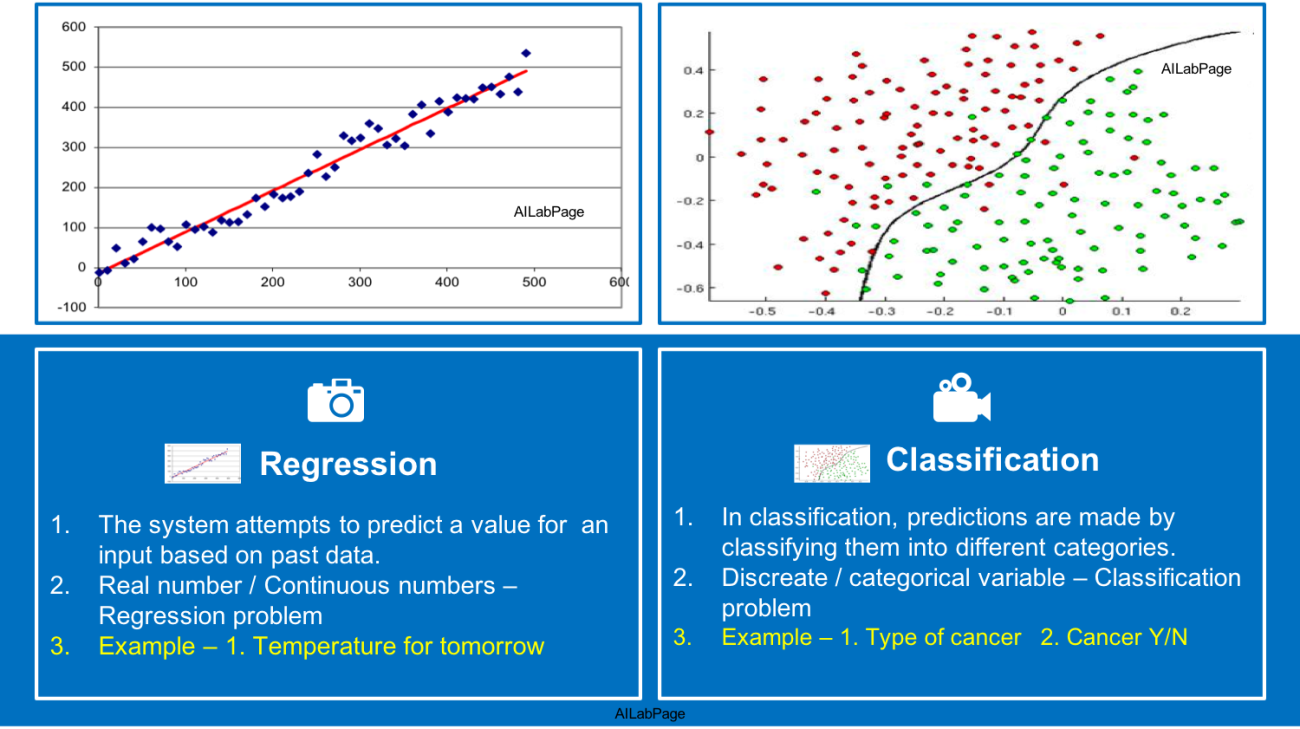

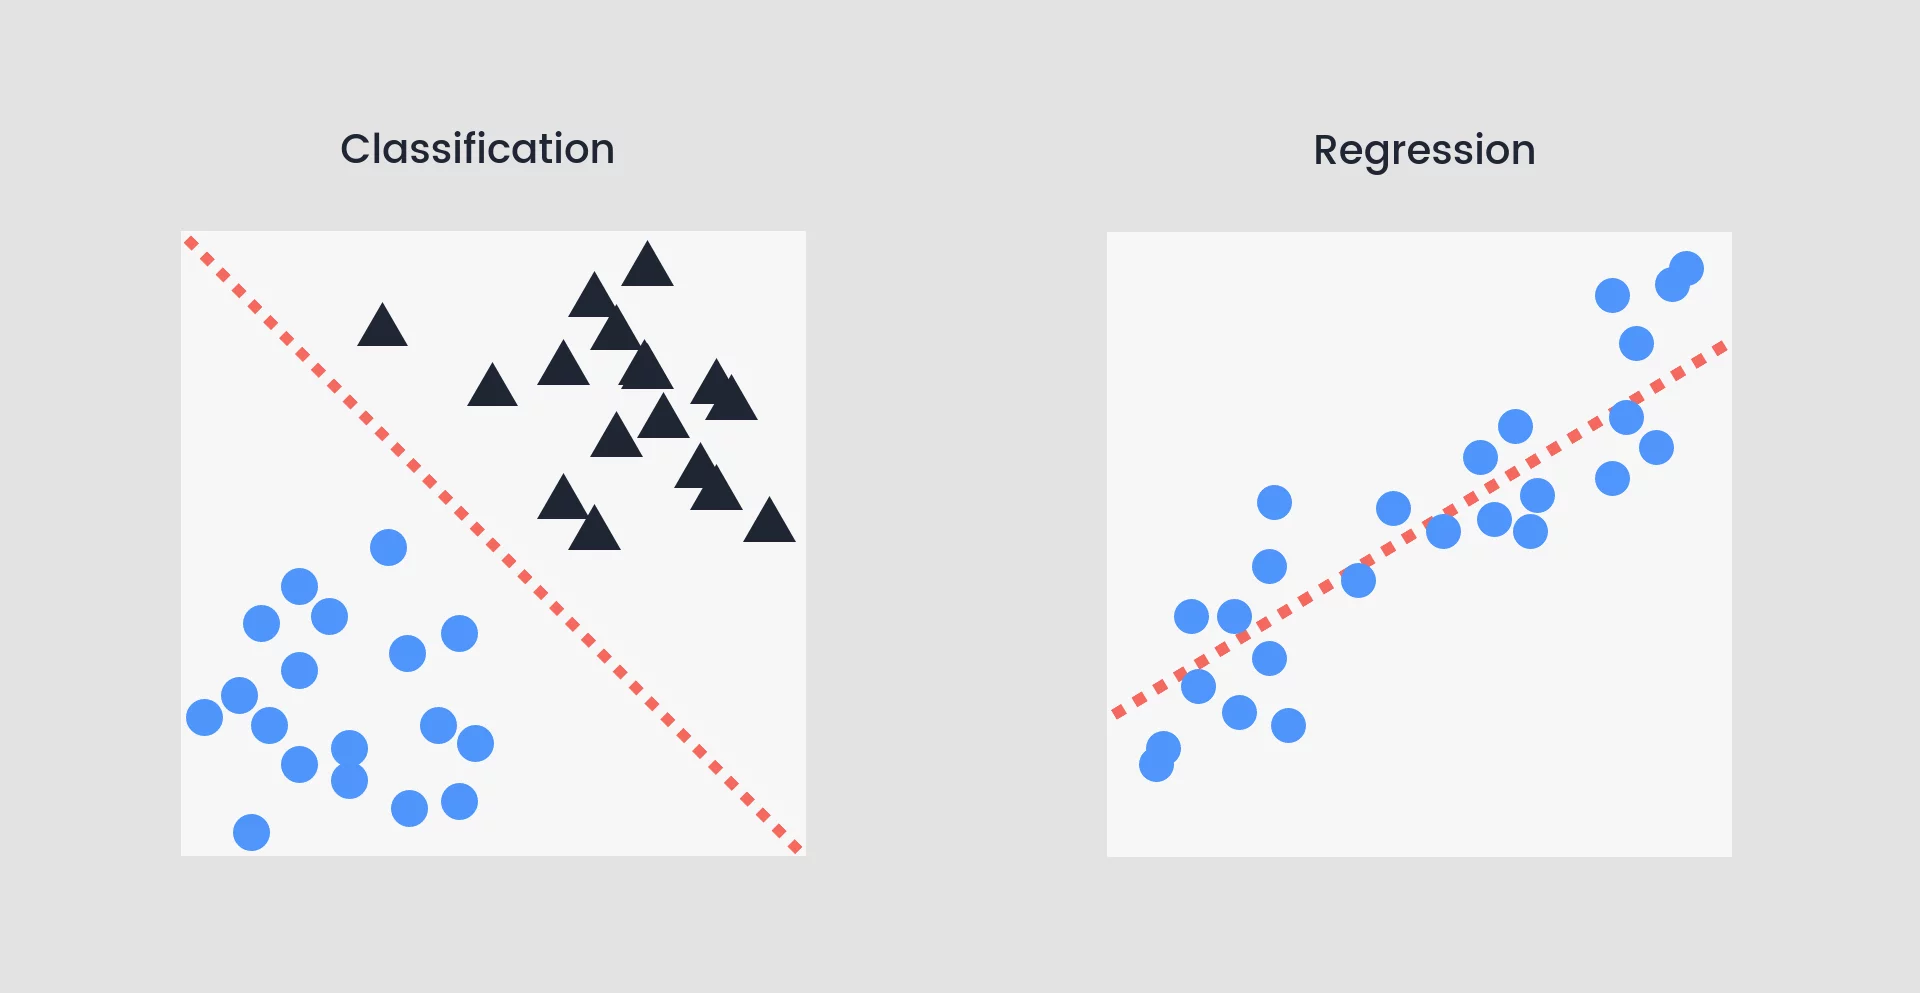

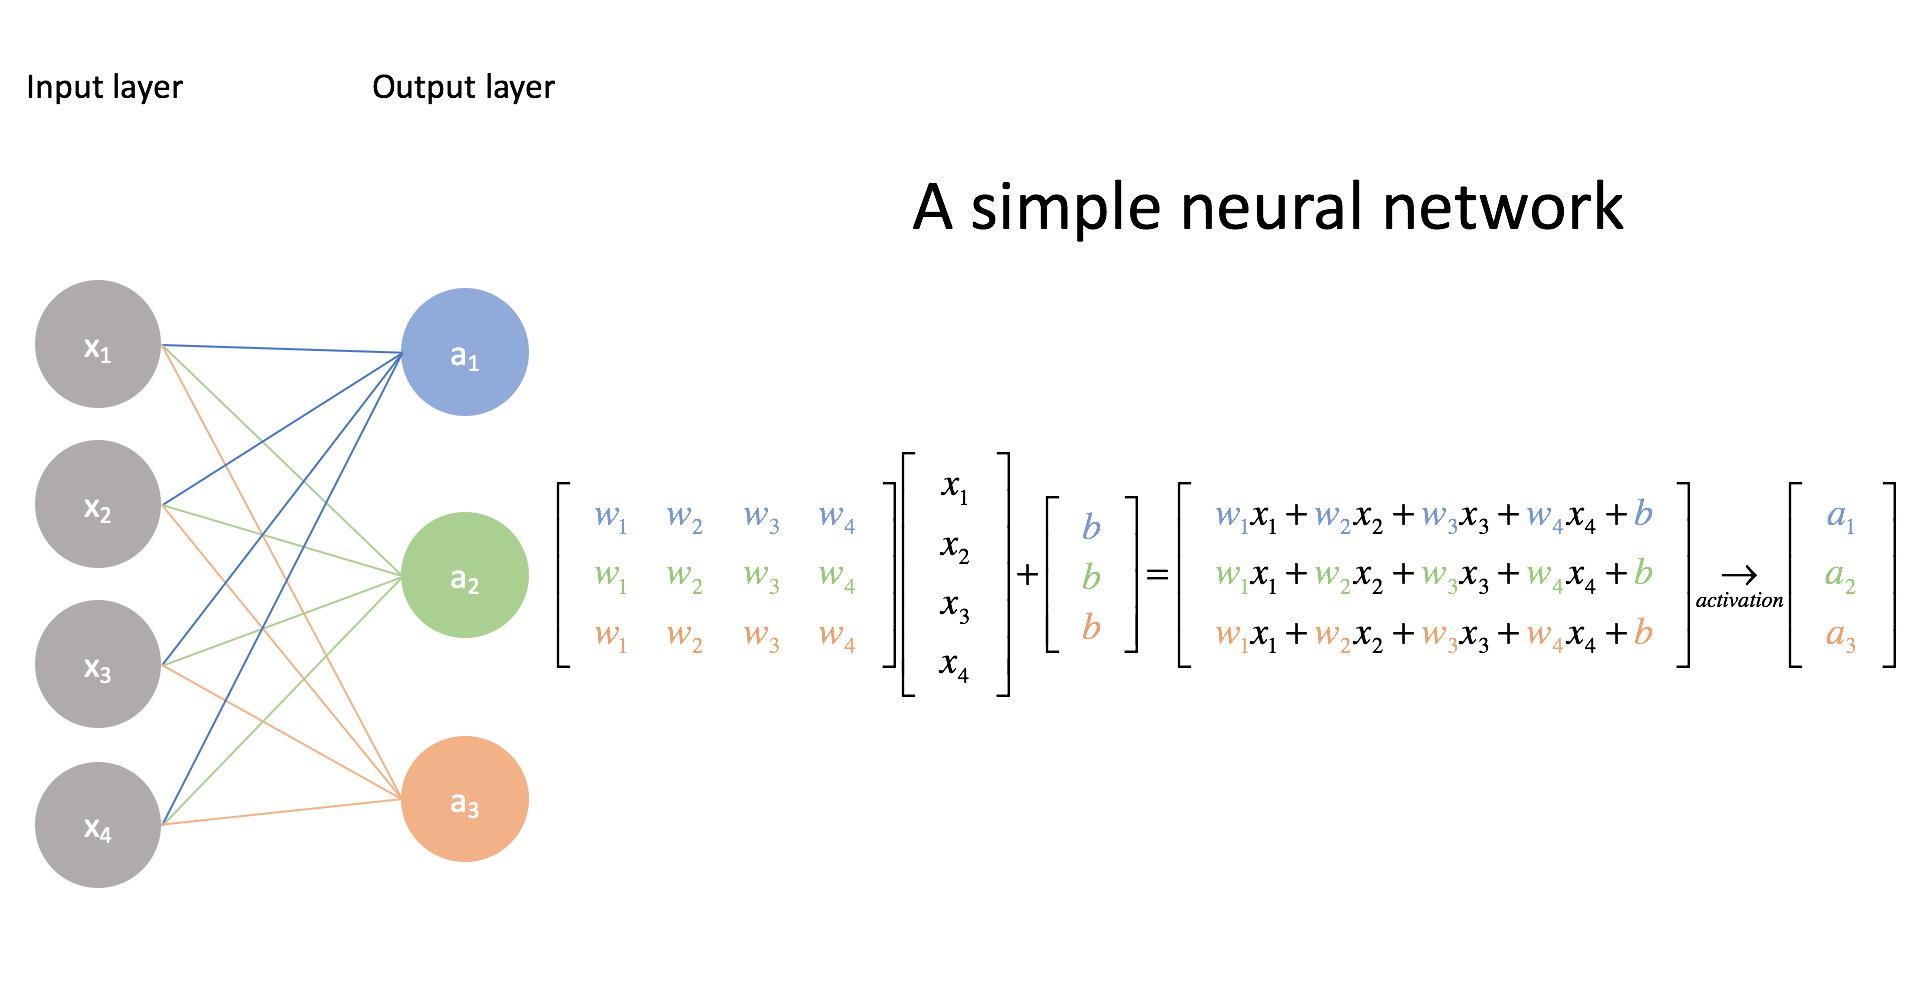

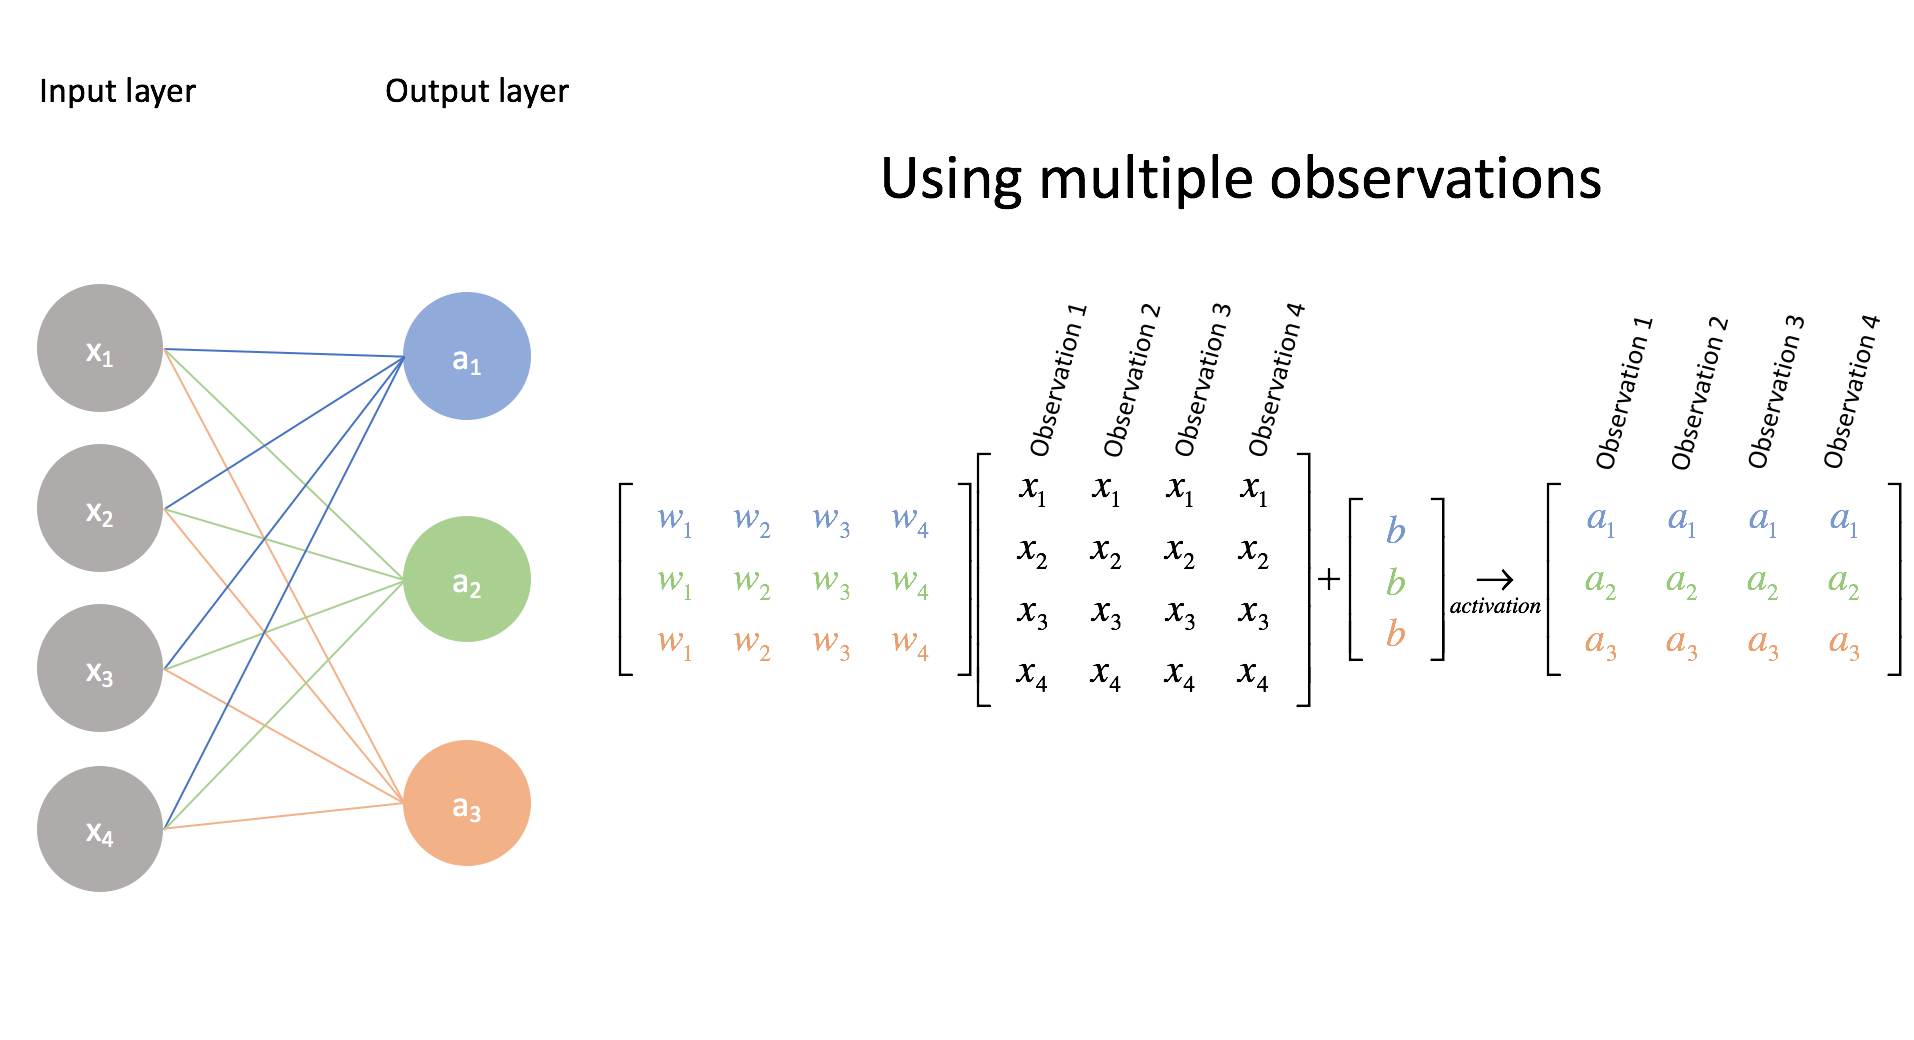

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-63wyp_u5
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-63wyp_u5
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=7271ce0d9f3df310be07f8633905f9bc47817c6c4a7abd5be748d53bf0687c41
  Stored in directory: /tmp/pip-ephem-wheel-cache-j85q1746/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=250e072fa2584f30fb0dd5c8c85cc3d6a35764ef7f14365b1e20485fbc72a71d
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [2]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [3]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [4]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [5]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [7]:
X.shape

(60000, 1, 28, 28)

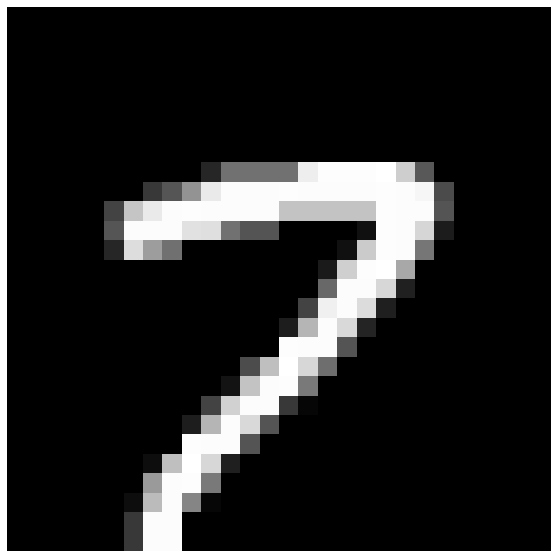

In [8]:
plot(X[123,0,0:28,0:28]) #plot dimensions of where the number 7 in on the image

In [9]:
Y[123] #image value equals 7

7

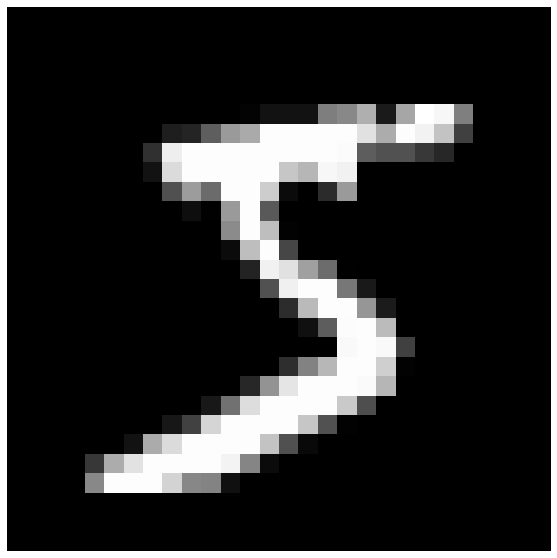

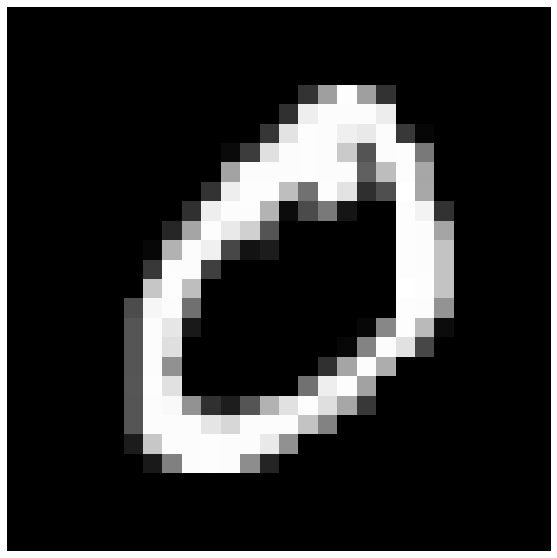

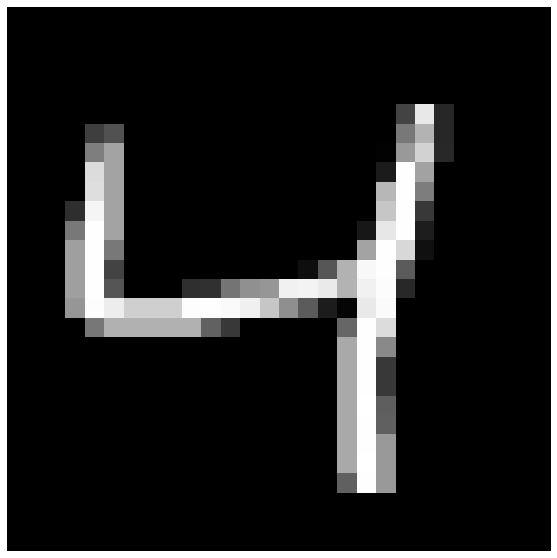

In [10]:
for i in range(3): #range of 3 images from number chart
    plot(X[i,0,:,:])

In [11]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [12]:
X[0:25,0,:,:].shape

(25, 28, 28)

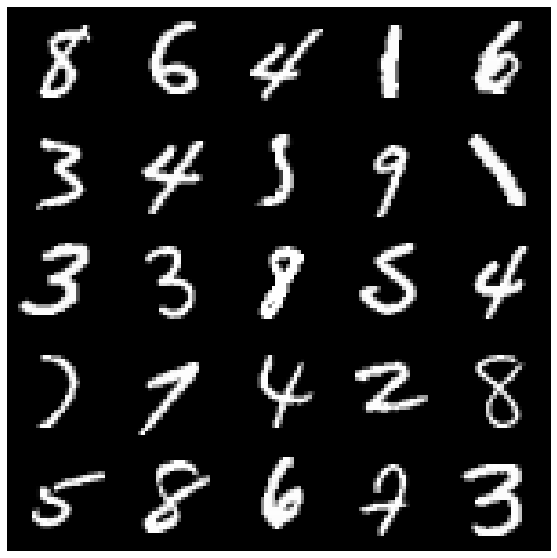

In [13]:
montage_plot(X[125:150,0,:,:]) #entire image of number chart

In [14]:
X.shape[0]

60000

In [15]:
X_test.shape

(10000, 1, 28, 28)

In [16]:
X.shape[0]

60000

In [17]:
X_test.shape[0]

10000

In [18]:
28*28

784

In [19]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [20]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [21]:
X[0] #array of all image values for x

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

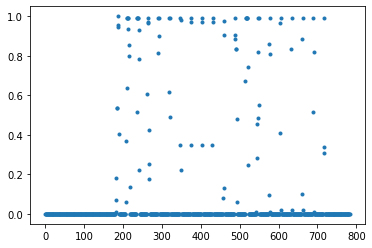

In [22]:
plt.plot(X[100],'.') #plot of x values on the chart 

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

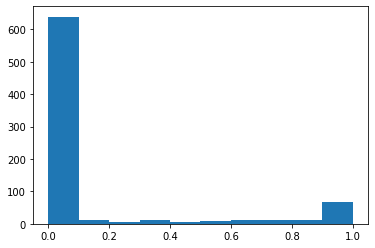

In [23]:
plt.hist(X[0])

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [25]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [26]:
W = torch.load("W.data")

In [27]:
W.shape

torch.Size([784, 10])

In [28]:
X.shape

torch.Size([60000, 784])

In [29]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

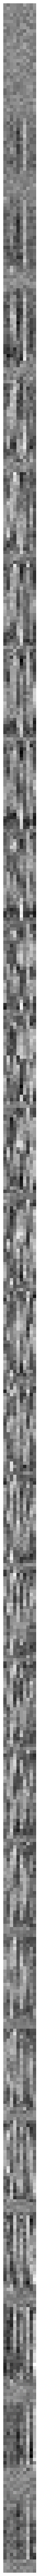

In [30]:
plot(W[0:784,:10]) #plot of stretched out image

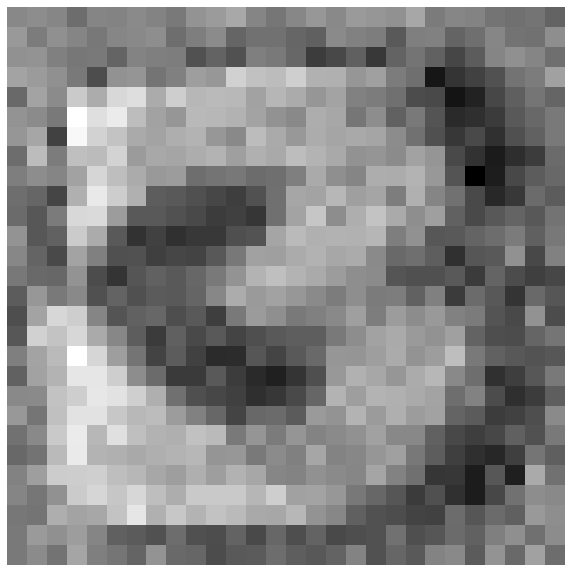

In [31]:
plot(W[:,3].reshape(28,28)) #reshape of the image found in this plot when unstretched

In [32]:
X.shape

torch.Size([60000, 784])

In [33]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [34]:
x,y = get_batch('train')

In [35]:
x.shape

torch.Size([40, 784])

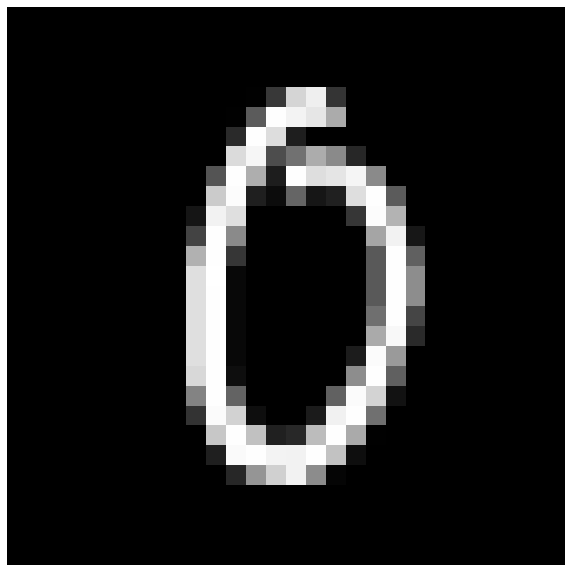

In [36]:
plot(x[0].reshape(28,28)) #reshape of plot 28,28

In [37]:
y

tensor([0., 5., 4., 6., 6., 4., 6., 7., 8., 3., 1., 6., 2., 8., 5., 0., 8., 3.,
        1., 7., 8., 4., 4., 0., 0., 6., 6., 9., 8., 2., 9., 6., 3., 5., 2., 6.,
        2., 9., 5., 0.], device='cuda:0')

In [38]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [39]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [40]:
(x@W).shape

torch.Size([40, 10])

In [41]:
y = x@W

In [42]:
y.shape

torch.Size([40, 10])

In [43]:
y

tensor([[  7.3662,  -8.6337,   0.7777,  -1.7670,  -4.7371,   0.6610,   0.0697,
          -1.1849,   0.5431,  -1.6932],
        [  5.8264, -10.9875,  -1.8198,   5.3611,  -7.0024,  15.4623,  -7.9408,
          -4.2753,   2.9776,  -5.9590],
        [ -1.6203,  -8.2192,  -2.8558,  -1.2141,  13.5661,  -0.2453,   2.2279,
          -2.1024,   3.4813,   5.1540],
        [  2.3584, -16.4864,  -0.5823,  -8.3885,  -0.2725,  -3.3600,  13.8676,
         -17.5539,  -1.0797,   1.1526],
        [ -4.1561,  -9.3746,   1.8332,  -6.3388,  -0.7354,  -4.2693,  10.1654,
          -4.2593,  -4.4895,  -4.2868],
        [ -0.4028,  -8.8542,  -3.7813, -13.6528,  14.6600,  -5.6326,   4.4944,
           1.0618,   0.5069,   4.3998],
        [ -0.2852,  -3.9650,  -2.5521,  -6.9972,   0.8037,  -0.3015,  14.0660,
         -12.4337,  -0.5627,  -4.5000],
        [ -3.0863,  -2.9363,  -2.7971,  -0.5946,  -1.2836,  -1.6800,  -5.0924,
           9.7622,   1.7934,   7.0082],
        [ -1.2731,  -4.2290,  -3.3306,  -0.4850,

In [44]:
torch.argmax(y,1)

tensor([0, 5, 4, 6, 6, 4, 6, 7, 8, 3, 1, 6, 2, 8, 5, 0, 8, 3, 1, 7, 8, 4, 4, 0,
        0, 6, 6, 9, 8, 2, 9, 6, 3, 5, 2, 6, 2, 9, 5, 0], device='cuda:0')

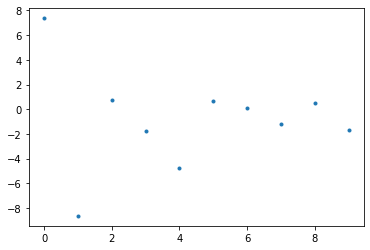

In [45]:
plt.plot(y[0].cpu().detach().numpy().T,'.')

https://eleif.net/clicktimer.html

In [46]:
x@W

tensor([[  7.3662,  -8.6337,   0.7777,  -1.7670,  -4.7371,   0.6610,   0.0697,
          -1.1849,   0.5431,  -1.6932],
        [  5.8264, -10.9875,  -1.8198,   5.3611,  -7.0024,  15.4623,  -7.9408,
          -4.2753,   2.9776,  -5.9590],
        [ -1.6203,  -8.2192,  -2.8558,  -1.2141,  13.5661,  -0.2453,   2.2279,
          -2.1024,   3.4813,   5.1540],
        [  2.3584, -16.4864,  -0.5823,  -8.3885,  -0.2725,  -3.3600,  13.8676,
         -17.5539,  -1.0797,   1.1526],
        [ -4.1561,  -9.3746,   1.8332,  -6.3388,  -0.7354,  -4.2693,  10.1654,
          -4.2593,  -4.4895,  -4.2868],
        [ -0.4028,  -8.8542,  -3.7813, -13.6528,  14.6600,  -5.6326,   4.4944,
           1.0618,   0.5069,   4.3998],
        [ -0.2852,  -3.9650,  -2.5521,  -6.9972,   0.8037,  -0.3015,  14.0660,
         -12.4337,  -0.5627,  -4.5000],
        [ -3.0863,  -2.9363,  -2.7971,  -0.5946,  -1.2836,  -1.6800,  -5.0924,
           9.7622,   1.7934,   7.0082],
        [ -1.2731,  -4.2290,  -3.3306,  -0.4850,

In [47]:
y2 = x@W 

In [48]:
y2.shape

torch.Size([40, 10])

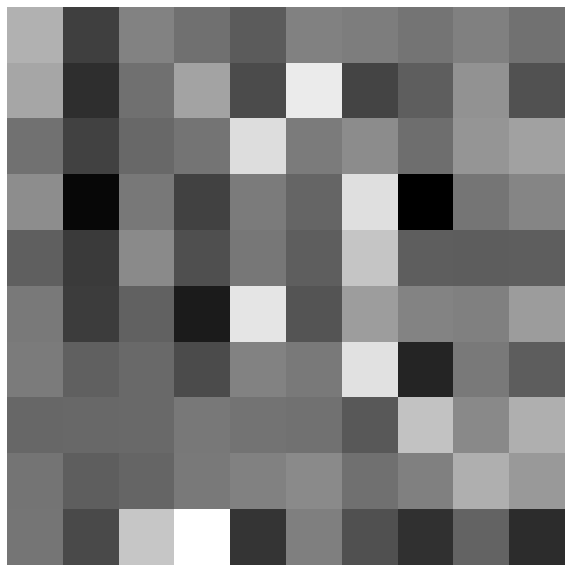

In [49]:
plot(y2[0:10,:])

In [50]:
y

tensor([[  7.3662,  -8.6337,   0.7777,  -1.7670,  -4.7371,   0.6610,   0.0697,
          -1.1849,   0.5431,  -1.6932],
        [  5.8264, -10.9875,  -1.8198,   5.3611,  -7.0024,  15.4623,  -7.9408,
          -4.2753,   2.9776,  -5.9590],
        [ -1.6203,  -8.2192,  -2.8558,  -1.2141,  13.5661,  -0.2453,   2.2279,
          -2.1024,   3.4813,   5.1540],
        [  2.3584, -16.4864,  -0.5823,  -8.3885,  -0.2725,  -3.3600,  13.8676,
         -17.5539,  -1.0797,   1.1526],
        [ -4.1561,  -9.3746,   1.8332,  -6.3388,  -0.7354,  -4.2693,  10.1654,
          -4.2593,  -4.4895,  -4.2868],
        [ -0.4028,  -8.8542,  -3.7813, -13.6528,  14.6600,  -5.6326,   4.4944,
           1.0618,   0.5069,   4.3998],
        [ -0.2852,  -3.9650,  -2.5521,  -6.9972,   0.8037,  -0.3015,  14.0660,
         -12.4337,  -0.5627,  -4.5000],
        [ -3.0863,  -2.9363,  -2.7971,  -0.5946,  -1.2836,  -1.6800,  -5.0924,
           9.7622,   1.7934,   7.0082],
        [ -1.2731,  -4.2290,  -3.3306,  -0.4850,

In [51]:
one_hot(y)

/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


ValueError: ignored

In [52]:
plot(one_hot(y))

ValueError: ignored

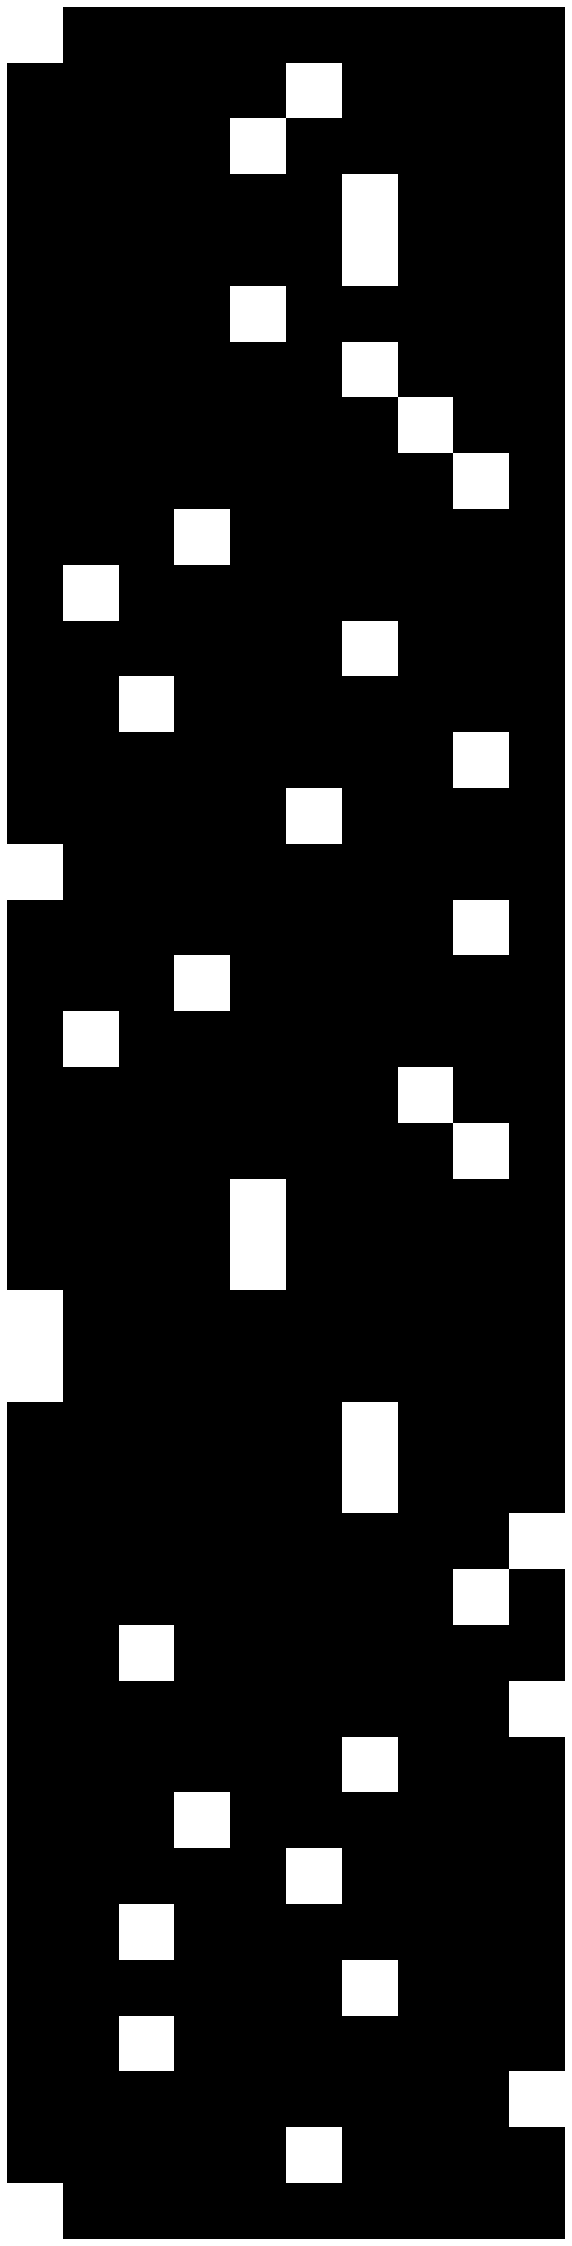

In [53]:
plot(one_hot(torch.argmax(y2,1))) #plot of all y values when put into an image

In [54]:
y

tensor([[  7.3662,  -8.6337,   0.7777,  -1.7670,  -4.7371,   0.6610,   0.0697,
          -1.1849,   0.5431,  -1.6932],
        [  5.8264, -10.9875,  -1.8198,   5.3611,  -7.0024,  15.4623,  -7.9408,
          -4.2753,   2.9776,  -5.9590],
        [ -1.6203,  -8.2192,  -2.8558,  -1.2141,  13.5661,  -0.2453,   2.2279,
          -2.1024,   3.4813,   5.1540],
        [  2.3584, -16.4864,  -0.5823,  -8.3885,  -0.2725,  -3.3600,  13.8676,
         -17.5539,  -1.0797,   1.1526],
        [ -4.1561,  -9.3746,   1.8332,  -6.3388,  -0.7354,  -4.2693,  10.1654,
          -4.2593,  -4.4895,  -4.2868],
        [ -0.4028,  -8.8542,  -3.7813, -13.6528,  14.6600,  -5.6326,   4.4944,
           1.0618,   0.5069,   4.3998],
        [ -0.2852,  -3.9650,  -2.5521,  -6.9972,   0.8037,  -0.3015,  14.0660,
         -12.4337,  -0.5627,  -4.5000],
        [ -3.0863,  -2.9363,  -2.7971,  -0.5946,  -1.2836,  -1.6800,  -5.0924,
           9.7622,   1.7934,   7.0082],
        [ -1.2731,  -4.2290,  -3.3306,  -0.4850,

In [55]:
torch.argmax(y2,1)

tensor([0, 5, 4, 6, 6, 4, 6, 7, 8, 3, 1, 6, 2, 8, 5, 0, 8, 3, 1, 7, 8, 4, 4, 0,
        0, 6, 6, 9, 8, 2, 9, 6, 3, 5, 2, 6, 2, 9, 5, 0], device='cuda:0')

In [56]:
b

40

In [57]:
torch.sum(y == torch.argmax(y2,1))/b

RuntimeError: ignored

In [58]:
X.shape

torch.Size([60000, 784])

In [59]:
%%timeit
X[20000]@W

26 µs ± 698 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [60]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [62]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [61]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [63]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [64]:
W.shape

torch.Size([784, 10])

In [65]:
W[:,0].shape

torch.Size([784])

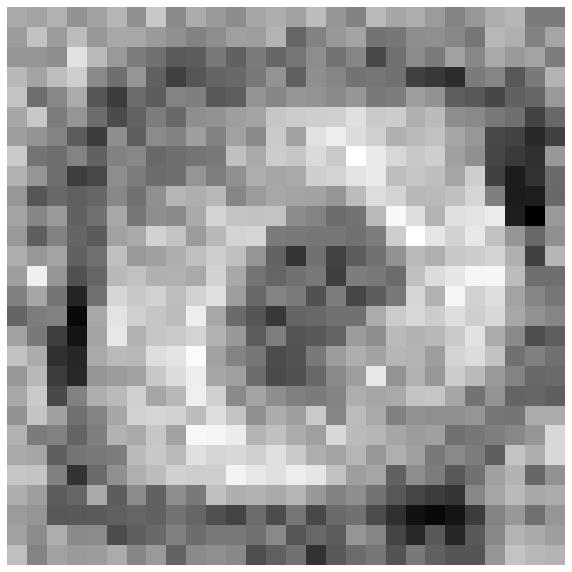

In [66]:
plot(W[:,0].reshape(28,28))

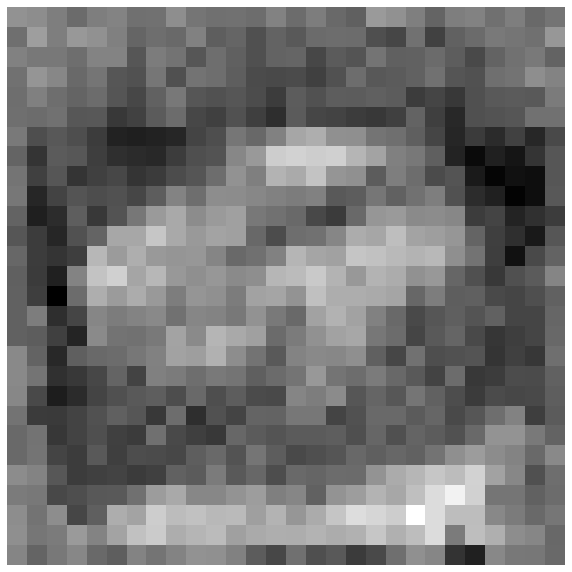

In [67]:
plot(W[:,9].reshape(28,28))

In [68]:
W.shape

torch.Size([784, 10])

In [69]:
(W.T).shape

torch.Size([10, 784])

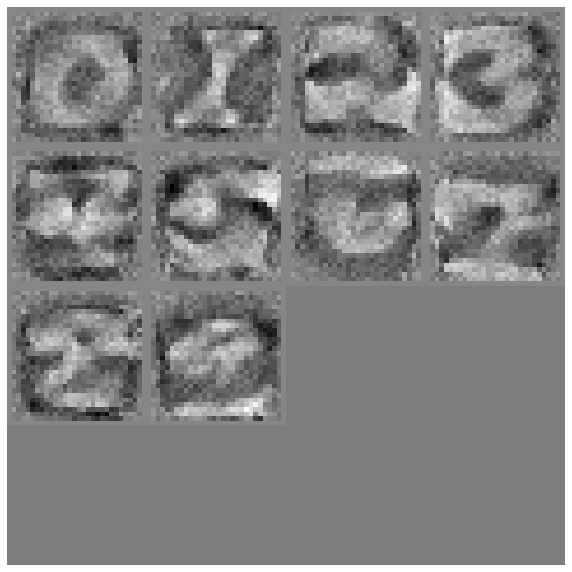

In [70]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy()) #full image reshaped in order to capture entire image

In [71]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [72]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [73]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [74]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [75]:
X.shape

torch.Size([60000, 784])

In [76]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [77]:
def model(x,w):

    return x@w[0]

In [78]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [80]:
wb.init(project="Simple_Linear_Adam_KMNIST"); #requires key to fully activate the code
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Generator

In [81]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [82]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [83]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [84]:
batch_size = 512

In [85]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [86]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [87]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [88]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [89]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [90]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [91]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [92]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [93]:
x,y = get_batch('train')

(array([286491.,  13820.,  10452.,   9582.,   9634.,  10395.,  13265.,
         18222.,  19551.,   9996.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

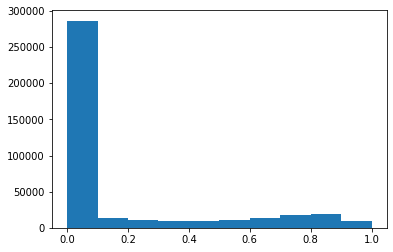

In [94]:
plt.hist(x.flatten().cpu().numpy())

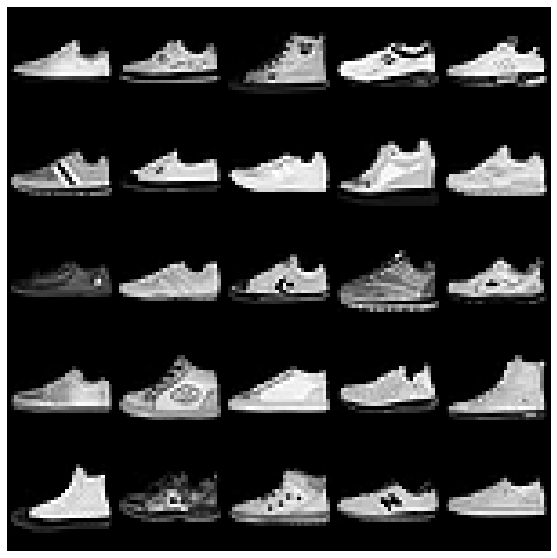

In [95]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy()) #plotted image of shoes from imported images

In [96]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [97]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [98]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [99]:
def Encoder(x,w):
    return x@w[0]

In [100]:
def Decoder(x,w):
    return x@(w[0].T)

In [101]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [102]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [103]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.3878093659877777
0.004089220426976681
0.003283575177192688
0.0036241651978343725
0.003249421017244458
0.003126088296994567
0.003290500259026885
0.00342622515745461
0.00338150467723608
0.0032024416141211987


In [104]:
# batch_size = 16

In [105]:
x,y = get_batch('test')

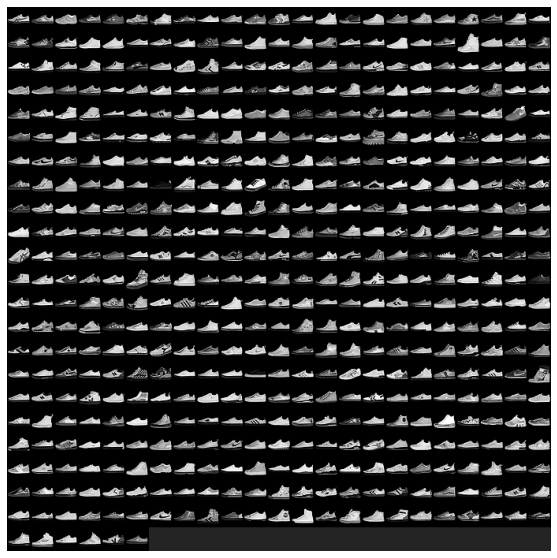

In [106]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy()) #entire montage of all images

In [107]:
x.shape

torch.Size([512, 784])

In [108]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [109]:
x2 = Autoencoder(x,w) #encodes x and w values

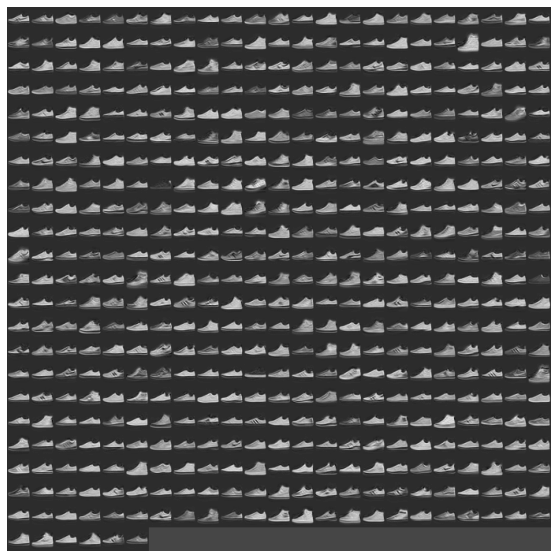

In [110]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #decoded images

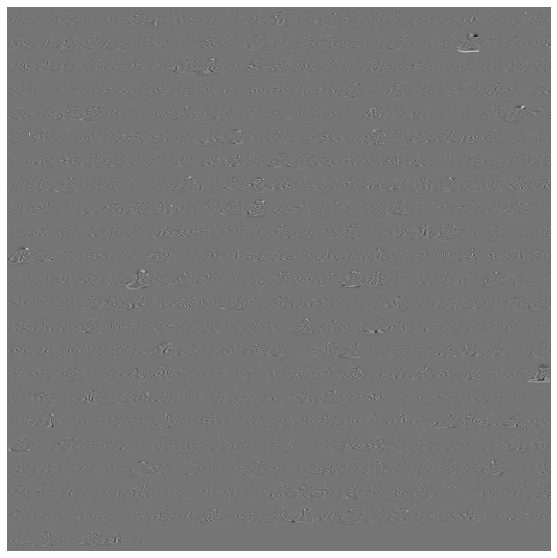

In [111]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy()) #more decoded images

In [112]:
w[0].shape

torch.Size([784, 78])

In [113]:
wp = w[0].T 

In [114]:
wp = wp.reshape(-1,28,28)

In [115]:
wp.shape

torch.Size([78, 28, 28])

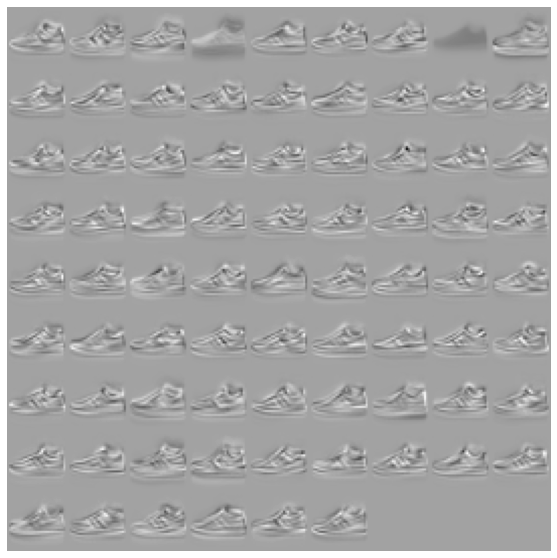

In [116]:
montage_plot(wp.detach().cpu().numpy())

In [117]:
x.shape

torch.Size([512, 784])

In [118]:
x = x[0:1]

In [119]:
y = Encoder(x,w)

In [120]:
y.shape

torch.Size([1, 78])

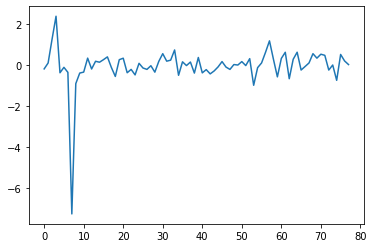

In [121]:
plt.plot(y[0].cpu().detach().numpy())

In [122]:
noise = 0.5*np.random.randn(78)

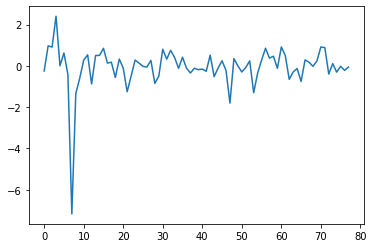

In [123]:
plt.plot(y[0].cpu().detach().numpy() + noise)

In [124]:
noise

array([-0.05376521,  0.87232276, -0.34672431,  0.0305358 ,  0.38550897,
        0.74289554, -0.04926398,  0.0949722 , -0.43235743, -0.19911766,
        0.62818869,  0.20310828, -0.67649505,  0.32293436,  0.37487628,
        0.59428994, -0.2565905 ,  0.30023284, -0.0026968 ,  0.07745809,
       -0.43409793, -0.87099067, -0.27736543,  0.76847778,  0.05648235,
        0.12820332,  0.16029761,  0.30642984, -0.49531173, -0.67336355,
        0.25867967,  0.14481472,  0.51985711, -0.32530816,  0.38933694,
        0.26761823, -0.07657994, -0.48400149,  0.28296355, -0.54663526,
        0.23341199, -0.0325699 ,  0.95545118, -0.22508937, -0.01101709,
        0.08613525, -0.1154338 , -1.58339132,  0.33451175,  0.01109008,
       -0.45721983, -0.04927143, -0.0637692 , -0.30961264, -0.21874197,
        0.18251589,  0.2404528 , -0.79857163,  0.18938258,  0.46185432,
        0.59978495, -0.11768041,  0.02039006, -0.56945984, -0.75042424,
       -0.50680691,  0.36814281,  0.08246908, -0.56993251, -0.09

In [125]:
noise = GPU(noise)

In [126]:
x2 = Decoder(y+noise,w)

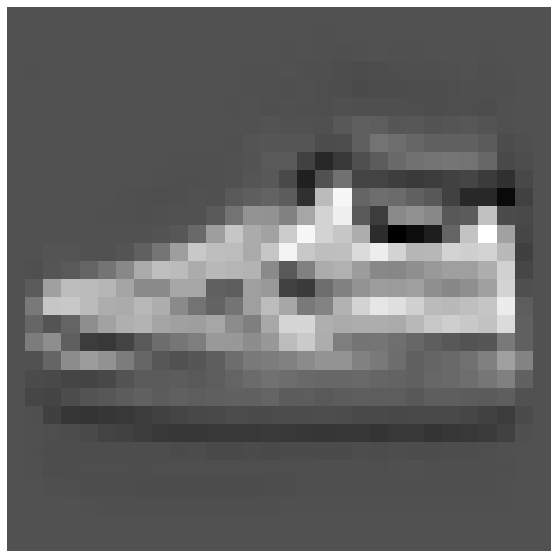

In [127]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #plot of single image from montage

In [128]:
x2 = Decoder(y,w) #decodes y and w values

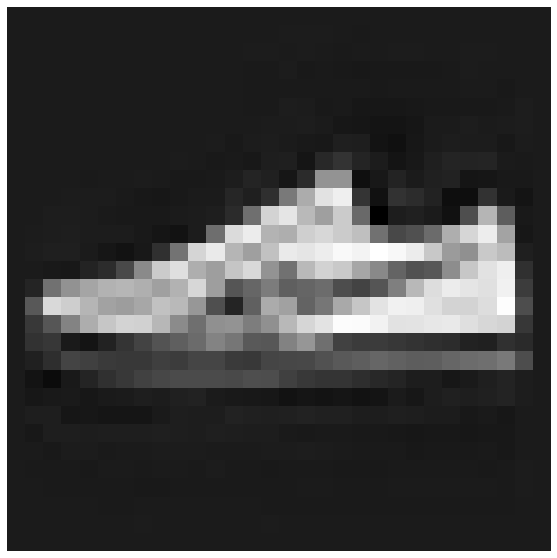

In [129]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())